In [59]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

scope = pd.read_csv(r"/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/project_1/output/scope.csv")


sand_scope = scope.loc[scope["coin"] == "sand"]
sand_scope["coin"] = "sand"
#circulating supply mana-1.800.000.000 / sand-900.000.000 aprox
sand_scope["circulating_supply"] = 900000000
mana_scope = scope.loc[scope["coin"] == "mana"]
mana_scope["coin"] = "mana"
#circulating supply mana-1.800.000.000 / sand-900.000.000 aprox
mana_scope["circulating_supply"] = 1800000000

scope = pd.concat([mana_scope.tail(350), sand_scope.tail(350)], join='outer')
scope["period"] = scope["date"].astype("str")
scope["market_cap"] = scope["close"] * scope["circulating_supply"]

scope_meta = pd.concat([mana_scope.tail(115), sand_scope.tail(115)], join='outer')
scope_meta["period"] = scope["date"].astype("str")
scope_meta["market_cap"] = scope["close"] * scope["circulating_supply"]

Text(0.5, 1.0, 'marketcap_analysis')

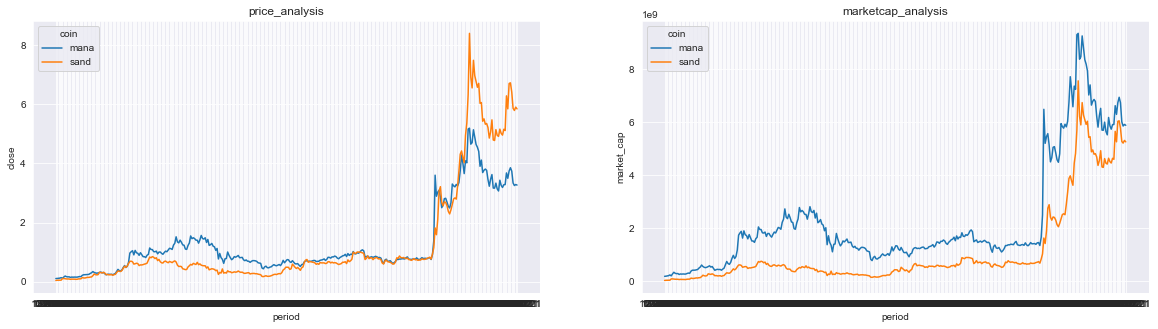

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True, sharey=False)

sns.lineplot(data=scope, x="period", y="close", hue="coin", ax=axes[0])
axes[0].set_title("price_analysis")
sns.lineplot(data=scope, x="period", y="market_cap", hue="coin", ax=axes[1])
axes[1].set_title("marketcap_analysis")

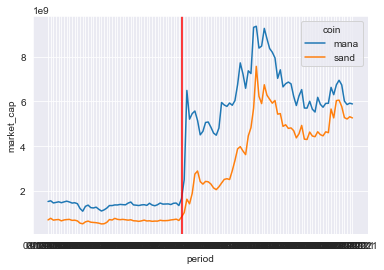

In [71]:
#facebook announcement its name change to meta 28-oct-2021
sns.lineplot(data=scope_meta, x="period", y="market_cap", hue="coin")
plt.axvline(x="28/10/2021", color='red')